### When thinking about what makes the best neighborhood, we decided to put ourselves in someone elses shoes...
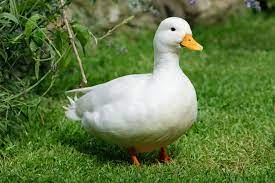

Deciding upon metrics for what makes the best neighborhood for a duck came pretty easily for us..
* Ducks love to waddle! This means that the more acres, the better!
* What duck doesn't love to swim, take a drink, or publicly bath? That's why water features a huge plus?
* Hunting season can be scary! And so can petty theft! That's why a low crime rate is key!

Of course, we considered other options (traffic, bread availibility, hunting statistics...) but decided these three were our golden combination. We found three datasets to correspond with our three metrics.
* Pittsburgh neighborhoods (contains acres)
* Water features in Pittsburgh neighborhoods 
* Crime rates in pittsburgh neighborhoods

In [21]:
import pandas as pd

# Acres

### Separate the neighborhoods and acres from the rest of the data

What duck doesn't love to waddle? And to waddle, you need land. For this purpose, I chose a dataset that included the total number of acres included in each Pittsburgh neighborhood to see which has the most waddle-ability. Data Set: [Neighborhoods](https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff)

In [22]:
acredata = pd.read_csv("neighborhoods.csv")

In [23]:
acreselected = acredata[['hood', 'acres']]
acreselected.head()

,hood,acres
0,Point Breeze North,193.229239
1,Squirrel Hill North,782.981547
2,Garfield,292.726125
3,Bedford Dwellings,112.431551
4,Knoxville,191.759777


In [24]:
acreindexed = acreselected.set_index("hood")
acreindexed.head()

,acres
hood,
Point Breeze North,193.229239
Squirrel Hill North,782.981547
Garfield,292.726125
Bedford Dwellings,112.431551
Knoxville,191.759777


###

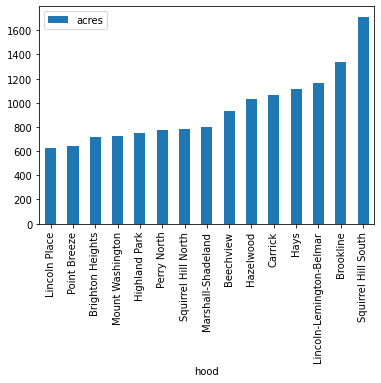

In [25]:
acresorted = acreindexed.sort_values("acres")
acresorted.tail(15).plot(kind='bar')

From the results, we can see that Squirrel Hill South is the clear winner, with a significant lead over the rest. Brookline, Lincoln-Lemington-Belmar, Hays, Carrick, Hazelwood, and Beechview are runners up. These results give us a piece of puzzle of deciding which neighborhood in Pittsburgh reigns supreme (in the eyes of hypothetical ducks).

# Water Features

### Create bar plot of total water features for each neighborhood

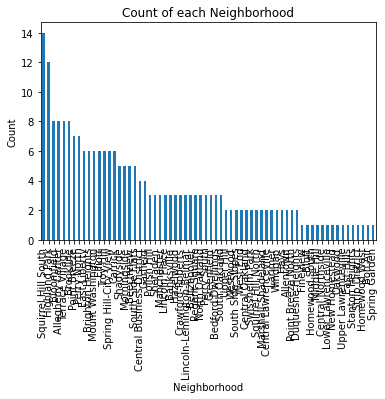

In [34]:
#Import Data Set
waterSet = pd.read_csv("water.tsv", sep="\t")
waterSet.head()
waterSet['neighborhood'].value_counts().sort_values(ascending=False)

# Get neighborhoods from dataSet
neighborhood_counts = waterSet['neighborhood'].value_counts()

# Create a bar plot of total water features for each neighborhood
neighborhood_counts.plot(kind='bar', xlabel='Neighborhood', ylabel='Count', title='Count of each Neighborhood')

### Split each bar by water feature type (Decorative, Drinking Fountain, Spray)

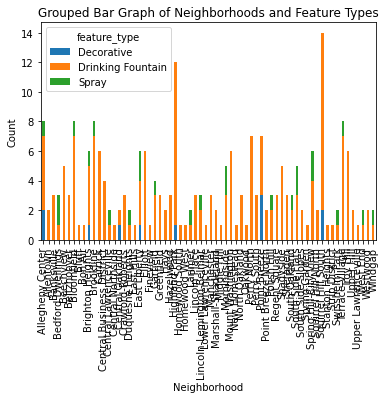

In [35]:
# Create a stacked grouped bar plot
grouped_data = waterSet.groupby(['neighborhood', 'feature_type']).size().unstack(fill_value=0)

# Create a stacked grouped bar plot
grouped_data.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Grouped Bar Graph of Neighborhoods and Feature Types')

### Sort the graph to be in descending order

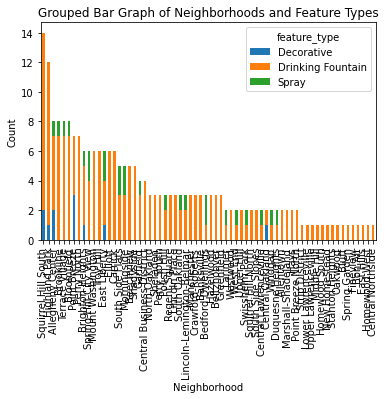

In [36]:
#Sort in descending order

total_count = grouped_data.sum(axis=1)

# Sort the neighborhoods based on the total count in descending order
sorted_neighborhoods = total_count.sort_values(ascending=False).index

# Reorder the DataFrame
grouped_data = grouped_data.loc[sorted_neighborhoods]

# Sort the bars within each neighborhood by the count of feature types
grouped_data = grouped_data.apply(lambda x: x.sort_values(ascending=False), axis=1)
grouped_data.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Grouped Bar Graph of Neighborhoods and Feature Types')

### Show the 15 neighborhoods with the most overall water features

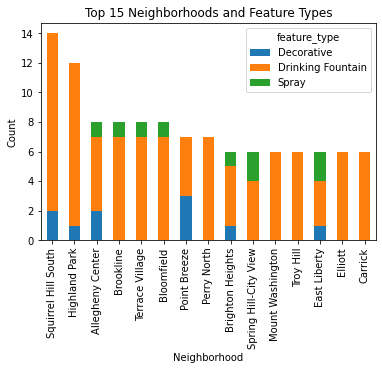

In [37]:
#Show the top 15 neighborhoods
top15 = grouped_data.head(15)
top15.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Top 15 Neighborhoods and Feature Types')

This data clearly shows that Squirell Hill South has the most water features by overall total. Looking at the graph shows 2 Devcorative features and 12 Drinking Fountains. Water is vital to ducks meaning that Squirrel Hill South is a fantastic place for them to live. While I may be biased, my original pick for best neighborhood in Pittsburgh would have either been Oakland or Shadyside, as they are the two neighborhoods I am most familiar with. However, because these neighborhoods are close to campus, they do not contain many open water features meaning a duck would not be able to thrive to the extent that it deserves.

# Crime Rate

Ducks are gentle and peaceful creatures, and should have a neighborhood to stay in that is the same. The datasets used were arrest data from neighborhoods in Pittsburgh along with census population data in order to analyze the safest place for a duck to stay. 

###  Organize crimes in pittsburgh by neighborhood

In [30]:
crime = pd.read_csv("crime.csv") #get the data

neigh = crime.groupby('INCIDENTNEIGHBORHOOD').count() #count how many arrests for each neighborhood
neigh['Crime count'] = neigh['_id'] #rename column

crime_count = neigh[[ "Crime count"]] #all other columns are useless
crime_count.head()

,Crime count
INCIDENTNEIGHBORHOOD,
Allegheny Center,1227
Allegheny West,127
Allentown,930
Arlington,302
Arlington Heights,153


### Put in ascending order and create a bar graph

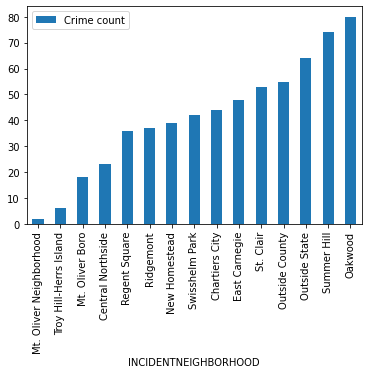

In [31]:
sorted_neigh = crime_count.sort_values(by = "Crime count", ascending=True) #sortsldfj
sorted_neigh.head(15).plot.bar()

### Get seperate population data and merge it with crime count. Create new metric 'Crime rate'

In [32]:
pop = pd.read_csv("populations.csv")
new_data = pd.merge(crime_count, pop, on="INCIDENTNEIGHBORHOOD")

new_data["Crime count"] = new_data["Crime count"].astype(int) #converting data cause i need to do math
new_data["Pop"] = new_data["Pop"].astype(int) 
new_data["Crime rate"] = new_data["Crime count"] / new_data["Pop"] #math

filtered_data = new_data[new_data["Pop"] > 1000] #exclude neighborhoods with population < 1000 because 
percentage_data = filtered_data[["INCIDENTNEIGHBORHOOD", "Crime rate"]] #the columns i want
percentage_data.head()

,INCIDENTNEIGHBORHOOD,Crime rate
0,Allentown,0.401208
1,Arlington,0.166483
2,Banksville,0.058158
3,Beechview,0.144575
4,Beltzhoover,0.298900


### Show top 15 Neighborhoods with lowest crime rate

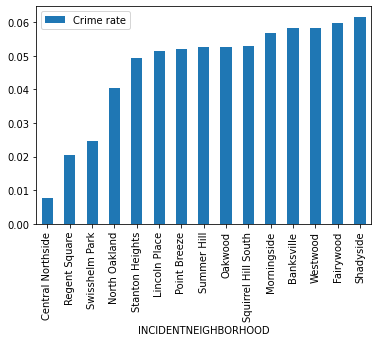

In [33]:
percentage_data = percentage_data.sort_values(by=["Crime rate"], ascending=True)
percentage_data.head(15).plot.bar(x="INCIDENTNEIGHBORHOOD")

According to this graph, Central northside is the clear safest area for a duck to live. Less dangerous people is better for duck and that is what Central Northside seems to provide. Other notable neighborhoods like North Oakland and Squirrel Hill South are among the bigger neighborhoods but still have low crime rates. My favorite neighborhood is Friendship because I live there, it's not in the graph but I feel very safe there (ranked 21 out of 60)

# Conclusion

Considering all the given data, it is clear that **Squirrel Hill South** is the best neighborhood for a duck to live in. It has plently of water features and the largest amount of acres. It doesn't rank at the top of the crime rate but it is still in the top 10 and it is the only neighborhood that's top 10 in every sub metric. All of these features are essential to a duck trying to live its best life. 